Seaborn是一种基于matplotlib的图形可视化python库。它提供了一种高度交互式界面，便于用户能够做出各种有吸引力的统计图表。Seaborn其实是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用Seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。应该把Seaborn视为matplotlib的补充，而不是替代物。

其有如下特点：

- 基于matplotlib aesthetics绘图风格，增加了一些绘图模式
- 增加调色板功能，利用色彩丰富的图像揭示您数据中的模式
- 运用数据子集绘制与比较单变量和双变量分布的功能
- 运用聚类算法可视化矩阵数据
- 灵活运用处理时间序列数据
- 利用网格建立复杂图像集



In [1]:
import sys
import logging


base_path = '/notebooks/eipi10/python-book/arsenal'
sys.path.append(base_path)
current_path = '.'
current_data_path = current_path + "/data"


logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)

import collections
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import time


from pprint import pprint
from eipi10.ml2.utils import *

pd.set_option('display.width', 1000)
os.environ["https_proxy"] = "http://web-proxy.rose.hp.com:8080"
os.environ["http_proxy"] = "http://web-proxy.rose.hp.com:8080"

%matplotlib inline

# 代码自动重新加载
%load_ext autoreload
%autoreload 2

#当module有新的方法的时候，需要运行下面方法。
%reload_ext autoreload 

## 1.2 变量分析绘图

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))


### 1.2.1  使用distplot()函数画直方图

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


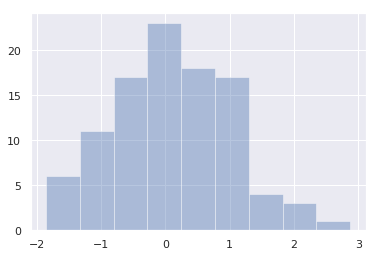

In [5]:

x = np.random.normal(size=100)
sns.distplot(x,kde=False) #distplot()函数会根据输入数据自动绘制直方图

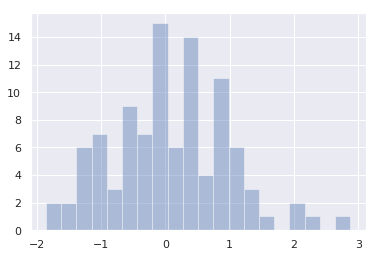

In [6]:
# 通过bins自己划分直方图的切分粒度
sns.distplot(x, bins=20, kde=False)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


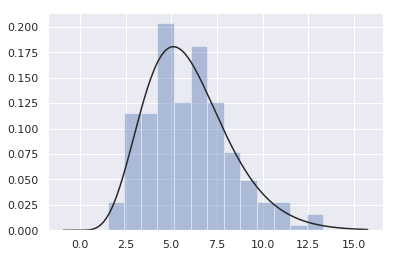

In [7]:
# 通过fit查看数据分布的情况
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

### 1.2.2 使用jointplot()函数绘制散点图

In [8]:
#生成数据
mean, cov = [0, 1], [(1, .5), (.5, 1)] #自定义均值与协方差
data = np.random.multivariate_normal(mean, cov, 200) #生成200个数据
df = pd.DataFrame(data, columns=["x", "y"]) #通过pandas读入数据
print(df.head())

          x         y
0  2.190873  2.902961
1  0.387901  3.441322
2 -1.304909  0.586173
3 -0.016867  0.907323
4  0.284953  1.189304


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


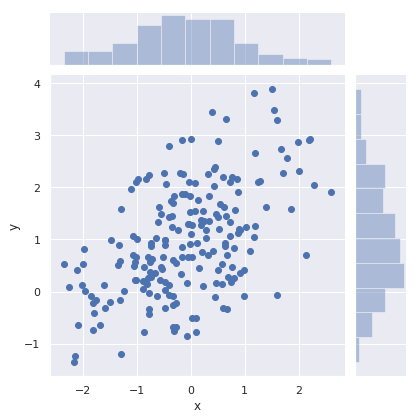

In [9]:
sns.jointplot(x="x", y="y", data=df)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


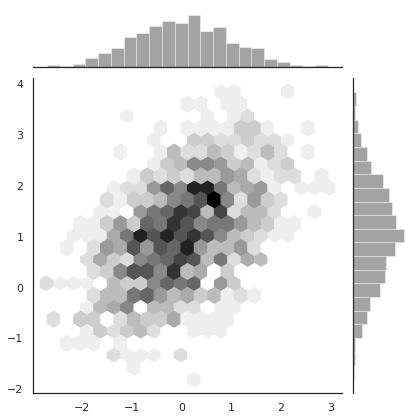

In [10]:
# 通过kind="hex"使散点图具备透视性，更加容易查看数据的散点分布密度情况
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

### 1.2.3 使用pairplot()函数绘制关系图


     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    

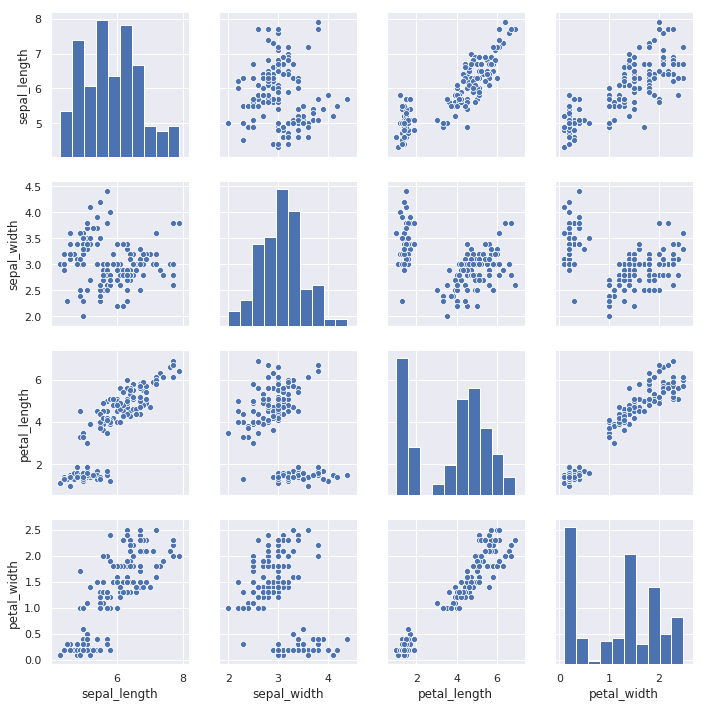

In [15]:
iris = sns.load_dataset("iris") #载入鸢尾花数据集
print(iris)
sns.pairplot(iris) #绘制



## 1.1 Seaborn 样式

https://xywang93.github.io/2018/01/09/Python/04-seaborn/

In [32]:
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

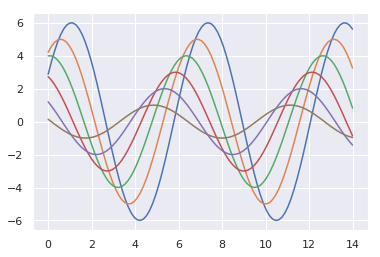

In [46]:
sinplot() #采用matplotlib绘制

### 1.11 Seaborn 样式

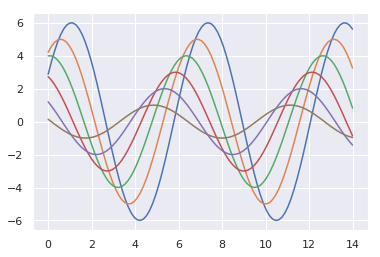

In [45]:
sns.set() #采用seaborn默认设置
sinplot()

Seaborn 5种主题风格
- darkgrid
- whitegrid
- dark
- white
- ticks

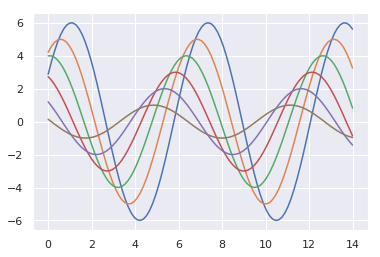

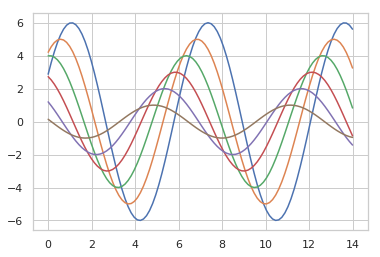

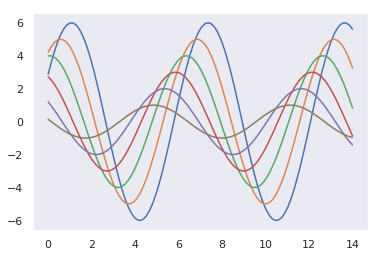

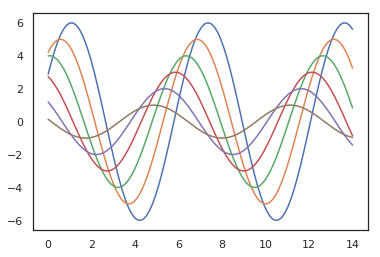

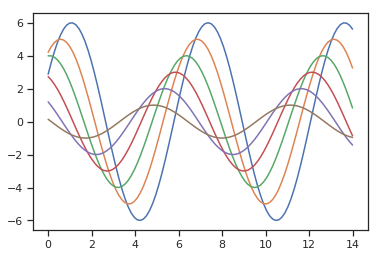

In [50]:
sns.set_style("darkgrid")
sinplot()
plt.show()
sns.set_style("whitegrid")
sinplot()
plt.show()
sns.set_style("dark")
sinplot()
plt.show()
sns.set_style("white")
sinplot()
plt.show()
sns.set_style("ticks")
sinplot()
plt.show()

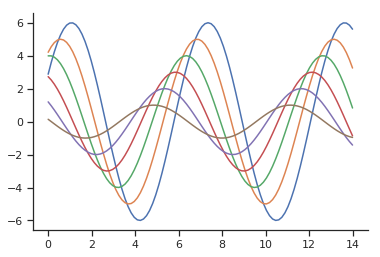

In [51]:
sns.set_style("ticks")
sinplot()
sns.despine() # 去除上面与右面轴线
plt.show()

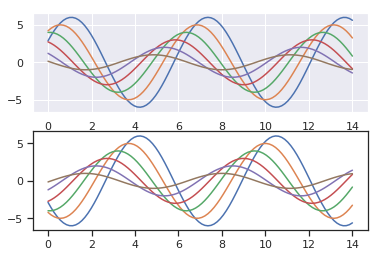

In [55]:
#临时设置图表样式 
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)

sinplot(-1)

**使用plotting_context()和set_context()设置布局元素的规模**

布局元素的规模被独立的参数集合控制,这能让你使用相同的代码得到不同大小的规模合适的布局.

有4种预设好的上下文(context),按相对大小排序分别是:
- paper
- notebook 
- talk
- poster  

缺省的规模是notebook,上述的所有图表都是它.

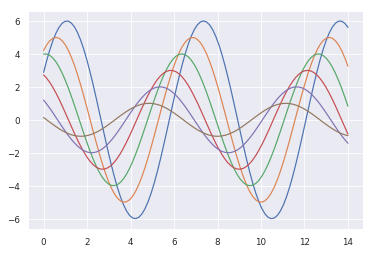

In [57]:
sns.set()  #重新调用set()函数得到缺省设置

sns.set_context("paper")
plt.figure(figsize=(8, 6))
sinplot()

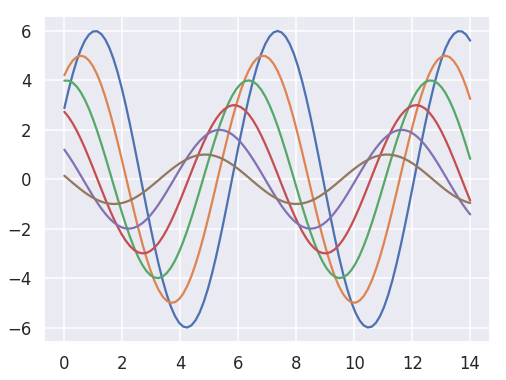

In [58]:
sns.set_context("talk")
plt.figure(figsize=(8, 6))
sinplot()

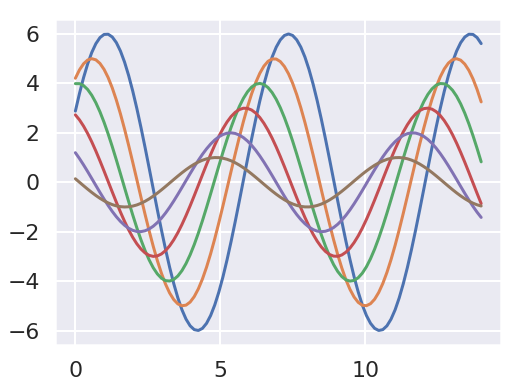

In [59]:
sns.set_context("poster")
plt.figure(figsize=(8, 6))
sinplot()